Diabetes dataset- ML classification
***Applied PCA, Used Kmeans to calculate Homogonity and Completeness score, split the dataset, build different models using logistic regression, DNN, Random Forest. Also plotted test prediction curve and accuarcy curve within certain thresholds***


### PCA
First we start with PCA. Using PCA, show the importance of each of the PCA dimensions on a bar plot. What is a reasonable number of dimensions in your opinion to obtain at least 95% explained_var_ratio?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn import metrics
import numpy as np
import seaborn as sns 

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.shape

(768, 9)

In [5]:
from sklearn.decomposition import PCA

In [6]:
pca=PCA()
reduced_pca=pca.fit_transform(df)

<BarContainer object of 9 artists>

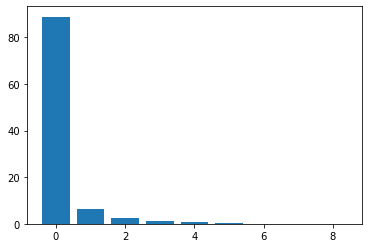

In [7]:
reduced_pca
reduced_pca.shape
pca.explained_variance_ratio_
plt.bar(np.arange(0,9), pca.explained_variance_ratio_*100)

In [8]:
pca=PCA(n_components=0.9)
reduced_pca=pca.fit_transform(df)
reduced_pca.shape #reduced the number of features to 2

(768, 2)

<BarContainer object of 6 artists>

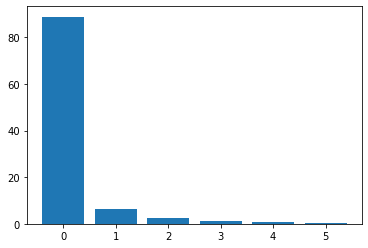

In [9]:
pca=PCA(n_components=6)
reduced_pca=pca.fit_transform(df)
reduced_pca.shape
plt.bar(np.arange(0,6), pca.explained_variance_ratio_*100)

## KMeans
Do clustering using KMeans on the original dataset (not the PCA) using K=2. Calculate Homogonity and Completeness score.

In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

In [11]:
from sklearn.cluster import KMeans
X = df.loc[:, df.columns != 'Outcome']
y = df['Outcome']

kmeans= KMeans(n_clusters=2)
kmeans.fit(df)
print(kmeans.cluster_centers_)

[[  3.7030303  141.46060606  72.78787879  31.2        253.70909091
   34.98545455   0.59724848  33.7030303    0.52121212]
 [  3.88391376 115.26699834  68.09784411  17.6185738   32.21227197
   31.17363184   0.43757048  33.11442786   0.30182421]]


In [12]:
y_pred=kmeans.fit_predict(df)

In [13]:
print('Homogeneit is',metrics.homogeneity_score(labels_true=y,labels_pred=y_pred)*100,'percent')

Homogeneit is 2.6659254297179364 percent


In [14]:
print('Completeness is',metrics.completeness_score(labels_true=y, labels_pred=y_pred)*100,'percent')

Completeness is 3.31406091804888 percent


### Split the data
Split the original dataset (not the PCA) to have 30% test data

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X= df.drop('Outcome', axis=1)
y=df.Outcome

In [17]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30,random_state=42)

### Logistic Regression
Using LR, what is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve

In [18]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()

In [19]:
logreg.fit(X_train, y_train)

C:\Users\Pookie\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
train_score = logreg.score(X_train, y_train)
print('Training accuracy is ', train_score)
test_score=logreg.score(X_test, y_test)
print('Testing accuracy is ', test_score)

Training accuracy is  0.7821229050279329
Testing accuracy is  0.7575757575757576


In [21]:
pred=logreg.predict(X_test)
prob=logreg.predict_proba(X_test)

In [22]:
print(prob)
print(pred)

[[0.66555474 0.33444526]
 [0.77634677 0.22365323]
 [0.80336856 0.19663144]
 [0.77919294 0.22080706]
 [0.55104201 0.44895799]
 [0.57766826 0.42233174]
 [0.94451754 0.05548246]
 [0.33756318 0.66243682]
 [0.4703799  0.5296201 ]
 [0.32350476 0.67649524]
 [0.68888925 0.31111075]
 [0.22204816 0.77795184]
 [0.534946   0.465054  ]
 [0.70635853 0.29364147]
 [0.86599693 0.13400307]
 [0.59891334 0.40108666]
 [0.82976388 0.17023612]
 [0.86602766 0.13397234]
 [0.12622393 0.87377607]
 [0.47699437 0.52300563]
 [0.73656585 0.26343415]
 [0.88110041 0.11889959]
 [0.53251735 0.46748265]
 [0.84272161 0.15727839]
 [0.47669974 0.52330026]
 [0.21804319 0.78195681]
 [0.79521007 0.20478993]
 [0.92111787 0.07888213]
 [0.74345584 0.25654416]
 [0.83434615 0.16565385]
 [0.22871859 0.77128141]
 [0.25319003 0.74680997]
 [0.27823091 0.72176909]
 [0.17468609 0.82531391]
 [0.54357129 0.45642871]
 [0.37942018 0.62057982]
 [0.13373877 0.86626123]
 [0.78631196 0.21368804]
 [0.51730197 0.48269803]
 [0.25471009 0.74528991]


In [23]:
pred_test=logreg.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
cr=classification_report(y_test, pred_test)
print(cr)
cm = confusion_matrix(y_test, pred_test)
print(cm)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       151
           1       0.66      0.61      0.64        80

    accuracy                           0.76       231
   macro avg       0.73      0.72      0.73       231
weighted avg       0.75      0.76      0.76       231

[[126  25]
 [ 31  49]]


Area under the curve is 0.805794701986755


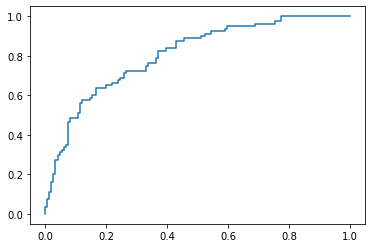

In [24]:
fpr,tpr,thre= metrics.roc_curve(y_test, prob[:,1])
plt.plot(fpr, tpr)
print('Area under the curve is',metrics.auc(fpr,tpr))

plot the test precision curve and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

C:\Users\Pookie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.6536796536796536

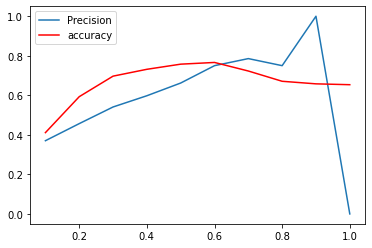

In [25]:
from sklearn import metrics
threshold= np.linspace(0.1,1,10)
precision_list= []
accuracy_list=[]
prob=logreg.predict_proba(X_test)
for i in threshold:
    my_pred = prob[:,1]>=i
    precision_list.append(metrics.precision_score(y_test, my_pred))
    accuracy_list.append(metrics.accuracy_score(y_test, my_pred))
plt.plot(threshold, precision_list)
plt.plot(threshold, accuracy_list, c="r")
plt.legend(['Precision','accuracy'],loc='upper left')
metrics.accuracy_score(y_test,my_pred)

## Deep Neural Networks
Using Keras, build a DNN that has better accuracy than LR. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve?

In [26]:
import tensorflow as tf
from tensorflow.keras import models, layers
model = models.Sequential()
model.add(layers.Dense(150,input_dim=8, activation = 'relu'))
model.add(layers.Dense(100, activation = 'relu'))
model.add(layers.Dense(50, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.compile(loss='binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.fit(X,y, epochs=200, batch_size=10)

Train on 768 samples
Epoch 1/200
768/768 [==============================] - 0s 184us/sample - loss: 1.1285 - accuracy: 0.5990
Epoch 2/200
768/768 [==============================] - 0s 113us/sample - loss: 1.0108 - accuracy: 0.6276
Epoch 3/200
768/768 [==============================] - 0s 119us/sample - loss: 0.7268 - accuracy: 0.6471
Epoch 4/200
768/768 [==============================] - 0s 114us/sample - loss: 0.7267 - accuracy: 0.6576
Epoch 5/200
768/768 [==============================] - 0s 116us/sample - loss: 0.6854 - accuracy: 0.6536
Epoch 6/200
768/768 [==============================] - 0s 118us/sample - loss: 0.7253 - accuracy: 0.6641
Epoch 7/200
768/768 [==============================] - 0s 121us/sample - loss: 0.6462 - accuracy: 0.6862
Epoch 8/200
768/768 [==============================] - 0s 116us/sample - loss: 0.6524 - accuracy: 0.6745
Epoch 9/200
768/768 [==============================] - 0s 112us/sample - loss: 0.6160 - accuracy: 0.7005
Epoch 10/200
768/768 [============

768/768 [==============================] - 0s 113us/sample - loss: 0.4640 - accuracy: 0.7786
Epoch 76/200
768/768 [==============================] - 0s 110us/sample - loss: 0.4628 - accuracy: 0.7773
Epoch 77/200
768/768 [==============================] - 0s 110us/sample - loss: 0.4401 - accuracy: 0.7865
Epoch 78/200
768/768 [==============================] - 0s 121us/sample - loss: 0.4442 - accuracy: 0.7969
Epoch 79/200
768/768 [==============================] - 0s 112us/sample - loss: 0.4480 - accuracy: 0.7826
Epoch 80/200
768/768 [==============================] - 0s 112us/sample - loss: 0.4660 - accuracy: 0.7760
Epoch 81/200
768/768 [==============================] - 0s 121us/sample - loss: 0.4573 - accuracy: 0.7812
Epoch 82/200
768/768 [==============================] - 0s 119us/sample - loss: 0.4310 - accuracy: 0.7943
Epoch 83/200
768/768 [==============================] - 0s 116us/sample - loss: 0.4376 - accuracy: 0.7852
Epoch 84/200
768/768 [==============================] - 0s 

Epoch 151/200
768/768 [==============================] - 0s 125us/sample - loss: 0.3119 - accuracy: 0.8633
Epoch 152/200
768/768 [==============================] - 0s 113us/sample - loss: 0.3468 - accuracy: 0.8451
Epoch 153/200
768/768 [==============================] - 0s 117us/sample - loss: 0.3162 - accuracy: 0.8672
Epoch 154/200
768/768 [==============================] - 0s 126us/sample - loss: 0.3113 - accuracy: 0.8568
Epoch 155/200
768/768 [==============================] - 0s 108us/sample - loss: 0.3184 - accuracy: 0.8633
Epoch 156/200
768/768 [==============================] - 0s 109us/sample - loss: 0.2958 - accuracy: 0.8620
Epoch 157/200
768/768 [==============================] - 0s 116us/sample - loss: 0.2743 - accuracy: 0.8698
Epoch 158/200
768/768 [==============================] - 0s 118us/sample - loss: 0.2870 - accuracy: 0.8529
Epoch 159/200
768/768 [==============================] - 0s 117us/sample - loss: 0.2822 - accuracy: 0.8685
Epoch 160/200
768/768 [==============

In [27]:
pred=model.predict_classes(X)

In [28]:
from sklearn.metrics import classification_report, confusion_matrix
(confusion_matrix(y,pred))
print(classification_report(y,pred))

              precision    recall  f1-score   support

           0       0.94      0.93      0.94       500
           1       0.88      0.89      0.88       268

    accuracy                           0.92       768
   macro avg       0.91      0.91      0.91       768
weighted avg       0.92      0.92      0.92       768



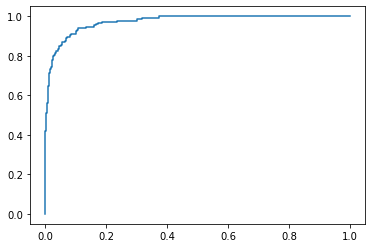

In [29]:
from sklearn import metrics
prob = model.predict(X)
#Plotting the RoC Curve
fpr,tpr,thre= metrics.roc_curve(y, prob)
plt.plot(fpr, tpr)


plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

C:\Users\Pookie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


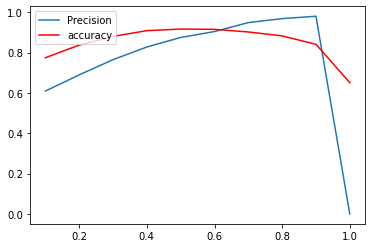

In [30]:
from sklearn import metrics
threshold= np.linspace(0.1,1,10)
precision_list= []
accuracy_list=[]
recall_list=[]
for i in threshold:
    my_pred = prob[:,]>=i
    precision_list.append(metrics.precision_score(y, my_pred))
    accuracy_list.append(metrics.accuracy_score(y,my_pred))
plt.plot(threshold, precision_list)
plt.plot(threshold, accuracy_list, c="r")
plt.legend(['Precision','accuracy'],loc='upper left')

## Random Forest
Build a random forest with `n_estimators=100`. What is the accuracy, precision and recall and F1 score for the training and the test data? Plot the ROC curve? Is the model overfitting

In [31]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [32]:
rfc_pred = rfc.predict(X_test)

In [33]:
from sklearn.metrics import classification_report, confusion_matrix
(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       151
           1       0.64      0.61      0.62        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.72       231
weighted avg       0.74      0.74      0.74       231



build another model to limit the overfitting problem by using `n_estimators=1000, max_depth=8` as your random forest parameters. Is the overfitting better now?

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, max_depth=8)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [35]:
rfc_pred = rfc.predict(X_test)
rfc_pred
rfc_prob=rfc.predict_proba(X_test)
rfc_prob


array([[0.53391572, 0.46608428],
       [0.82060683, 0.17939317],
       [0.87056288, 0.12943712],
       [0.80734044, 0.19265956],
       [0.54001914, 0.45998086],
       [0.44632311, 0.55367689],
       [0.99697246, 0.00302754],
       [0.40034698, 0.59965302],
       [0.38832787, 0.61167213],
       [0.37936291, 0.62063709],
       [0.7407776 , 0.2592224 ],
       [0.20074309, 0.79925691],
       [0.65902426, 0.34097574],
       [0.63065013, 0.36934987],
       [0.9813112 , 0.0186888 ],
       [0.60222202, 0.39777798],
       [0.89165815, 0.10834185],
       [0.94141749, 0.05858251],
       [0.34167349, 0.65832651],
       [0.49712784, 0.50287216],
       [0.65268424, 0.34731576],
       [0.90804209, 0.09195791],
       [0.64992074, 0.35007926],
       [0.9771683 , 0.0228317 ],
       [0.40508592, 0.59491408],
       [0.12403099, 0.87596901],
       [0.91909374, 0.08090626],
       [0.97742793, 0.02257207],
       [0.83485719, 0.16514281],
       [0.79844854, 0.20155146],
       [0.

In [36]:
from sklearn.metrics import classification_report, confusion_matrix
(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.81       151
           1       0.65      0.66      0.65        80

    accuracy                           0.76       231
   macro avg       0.73      0.74      0.73       231
weighted avg       0.76      0.76      0.76       231



plot the test precision curve  and accuracy curve for decision thresholds between 0.1 to 1 with a step of 0.1

C:\Users\Pookie\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


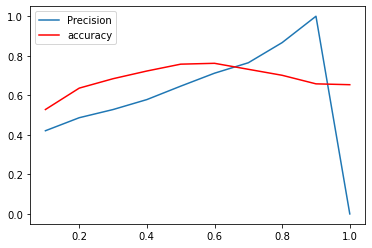

In [37]:
threshold= np.linspace(0.1,1,10)
precision_list= []
accuracy_list=[]
for i in threshold:
    my_pred = rfc_prob[:,1]>=i
    precision_list.append(metrics.precision_score(y_test, my_pred))
    accuracy_list.append(metrics.accuracy_score(y_test, my_pred))
plt.plot(threshold, precision_list)
plt.plot(threshold, accuracy_list, c="r")
plt.legend(['Precision','accuracy'],loc='upper left')

- Write a few lines about each of the three models and if there is one superior model and why do you think so?

In [38]:
print('The DNN is the best model in this scenario, It gave us a better accuracy result of over 90 %.However, the logistic Regression accuracy was higher than Random Forest. I noticed that the Random Forest model improved a little bit when we introduced the max_depth=8 and n_estimation of 1000')  

The DNN is the best model in this scenario, It gave us a better accuracy result of over 90 %.However, the logistic Regression accuracy was higher than Random Forest. I noticed that the Random Forest model improved a little bit when we introduced the max_depth=8 and n_estimation of 1000


![](machine_learning.png)